<a href="https://colab.research.google.com/github/LopesLeticia/LopesLeticia/blob/main/An%C3%A1lise_de_dados_nave_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE EXPLORATÓRIA DE DADOS DA NAVE TITANIC**

---

Utilizamos da metodologia CRISP-DM para organizar as ideias da análise e tornar coesa e coerente cada passo proposto, sendo: Entendimento do Negócio, Entendimento dos Dados, Preparação dos Dados, Construção dos Modelos, Avaliação e Implementação.

---

## **ENTENDENDO O NEGÓCIO**

Esta análise de dados se trata de prever se um passageiro foi transportado para uma dimensão alternativa durante a colisão da nave espacial Titanic com a anomalia do espaço-tempo.

A nave espacial Titanic foi um transatlântico interestelar de passageiros lançado há um mês. Com quase 13.000 passageiros a bordo, a nave partiu em sua viagem inaugural transportando emigrantes do nosso sistema solar para três exoplanetas recém-habitáveis ​​orbitando estrelas próximas.

Enquanto contornava Alpha Centauri a caminho de seu primeiro destino - o tórrido 55 Cancri E - a desavisada nave Titanic colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Infelizmente, ele encontrou um destino semelhante ao seu homônimo de 1000 anos antes. Embora a nave tenha permanecido intacta, quase metade dos passageiros foi transportada para uma dimensão alternativa!


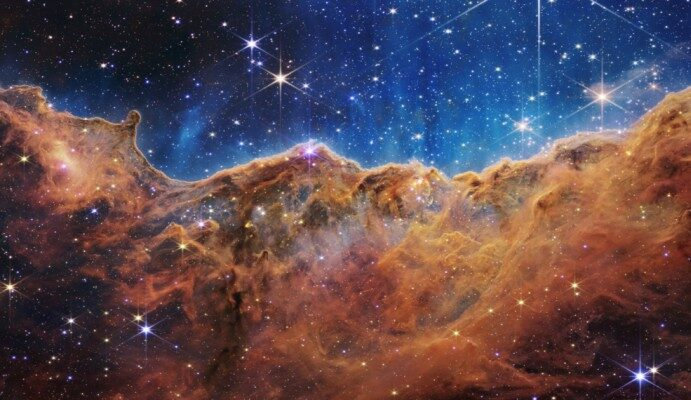

---

Podemos observar no dataframe train.csv os seguintes tópicos:

train.csv - Registros pessoais de cerca de dois terços (~8700) dos
passageiros, para serem usados ​​como dados de treinamento.


* PassengerId- Um ID único para cada passageiro. Cada ID assume a forma gggg_pponde ggggindica um grupo com o qual o passageiro está viajando e ppé seu número dentro do grupo. As pessoas em um grupo geralmente são membros da família, mas nem sempre.
* HomePlanet- O planeta de onde o passageiro partiu, normalmente seu planeta de residência permanente.
* CryoSleep- Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. Os passageiros em sono criogênico estão confinados em suas cabines.
* Cabin- O número da cabine onde o passageiro está hospedado. Toma a forma deck/num/side, onde sidepode ser tanto Ppara Bombordo como Spara Estibordo .
* Destination- O planeta para o qual o passageiro irá desembarcar.
* Age- A idade do passageiro.
* VIP- Se o passageiro pagou pelo serviço VIP especial durante a viagem.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Valor que o passageiro faturou em cada uma das muitas comodidades de luxo da Nave Espacial Titanic .
* Name- O nome e sobrenome do passageiro.
* Transported- Se o passageiro foi transportado para outra dimensão. Este é o alvo, a coluna que você está tentando prever.

test.csv - Registros pessoais para o terço restante (~4300) dos passageiros, para serem usados ​​como dados de teste

sample_submission.csv - Um arquivo de envio no formato correto.
* PassengerId- Id para cada passageiro no conjunto de teste.
* Transported- O alvo. Para cada passageiro, True ou False.

---

Agora que já tivemos uma noção com o que estamos trabalhando, podemos seguir para a próxima etapa da metodologia CRISP-DM.

## **ENTENDIMENTO DOS DADOS**

É necessário que seja feita uma análise dos dados





In [43]:
import pandas
import numpy
import seaborn
import matplotlib
import matplotlib.pyplot
matplotlib.rcParams['font.size'] = 18
seaborn.set_context('talk', font_scale=1.2);
%matplotlib inline

df = pandas.read_csv('train.csv')
dt = pandas.read_csv('test.csv')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Com a função shape, podemos ver a quantidade de linhas e colunas do nosso dataframe

In [25]:
df.shape

(8693, 14)

Concluímos que este dataframe possui 8693 linhas e 14 colunas

In [26]:
display(df.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Distribuímos as variáveis nos seguintes tipos: object, float64 e bool, sendo a maioria das variáveis numéricas (tipo float)

In [27]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [28]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


Traduzindo as variáveis para o nosso idioma, teremos a seguinte sequência tabelada:

In [29]:
df = df.rename(columns = {"PassengerId" : "IdPassageiro", "HomePlanet" : "Planeta Natal", "CryoSleep" : "Sono criogênico","Cabin" : "Cabine","Destination" : "Destino", "Age" : "Idade", "VIP" : "VIP", "RoomService" : "Serviço de Quarto", "FoodCourt" : "Praça de Alimentação", "ShoppingMall" : "Shopping", "Spa" : "Spa", "VRDeck" : "VRDeck", "Name" : "Nome", "Transported" : "Transportado"})
df.head()

,IdPassageiro,Planeta Natal,Sono criogênico,Cabine,Destino,Idade,VIP,Serviço de Quarto,Praça de Alimentação,Shopping,Spa,VRDeck,Nome,Transportado
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [30]:
df.tail()

,IdPassageiro,Planeta Natal,Sono criogênico,Cabine,Destino,Idade,VIP,Serviço de Quarto,Praça de Alimentação,Shopping,Spa,VRDeck,Nome,Transportado
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


Podemos ver as 5 primeiras e 5 últimas linhas

Podemos ver também se há algum dado faltante neste dataframe: 

In [31]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Sono criogênico         0.024963
Shopping                0.023927
VIP                     0.023352
Planeta Natal           0.023122
Nome                    0.023007
Cabine                  0.022892
VRDeck                  0.021627
Praça de Alimentação    0.021051
Spa                     0.021051
Destino                 0.020936
Serviço de Quarto       0.020821
Idade                   0.020591
IdPassageiro            0.000000
Transportado            0.000000
dtype: float64

Verificamos que, exceto IdPassageiro e Transportado, há dados faltantes, o que dificulta um pouco a análise do dataframe, pois não dá uma análise consisa, seria uma incompletude dos dados. Entretanto, são dados próximos do 0, ou seja, não há necessidade de excluí-los, neste caso.

In [32]:
df[['IdPassageiro','Planeta Natal','Sono criogênico','Cabine','Destino','Idade','VIP','Serviço de Quarto','Praça de Alimentação','Shopping','Spa','VRDeck','Nome','Transportado']].describe()

,Idade,Serviço de Quarto,Praça de Alimentação,Shopping,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Traduzindo para o português, conseguimos extrair as seguintes informações deste dataframe:

* count seria a quantidade de itens inclusos em cada variável

* mean seria a média desse determinado conjunto de dados, mas referente à cada variável

* std é a sigla para standard, o que significa padrão, ou seja, verificando o padrão de cada variável do dataframe

Vemos também o mínimo valor e o máximo valor destas amostras de dados, ou seja, valores extremos inferiores e superiores.

E os três quartis (25%,50% e 75%), 25% calcula a mediana da metade inferior dos dados, 50% é a mediana e 75% a mediana da metade superior dos dados.

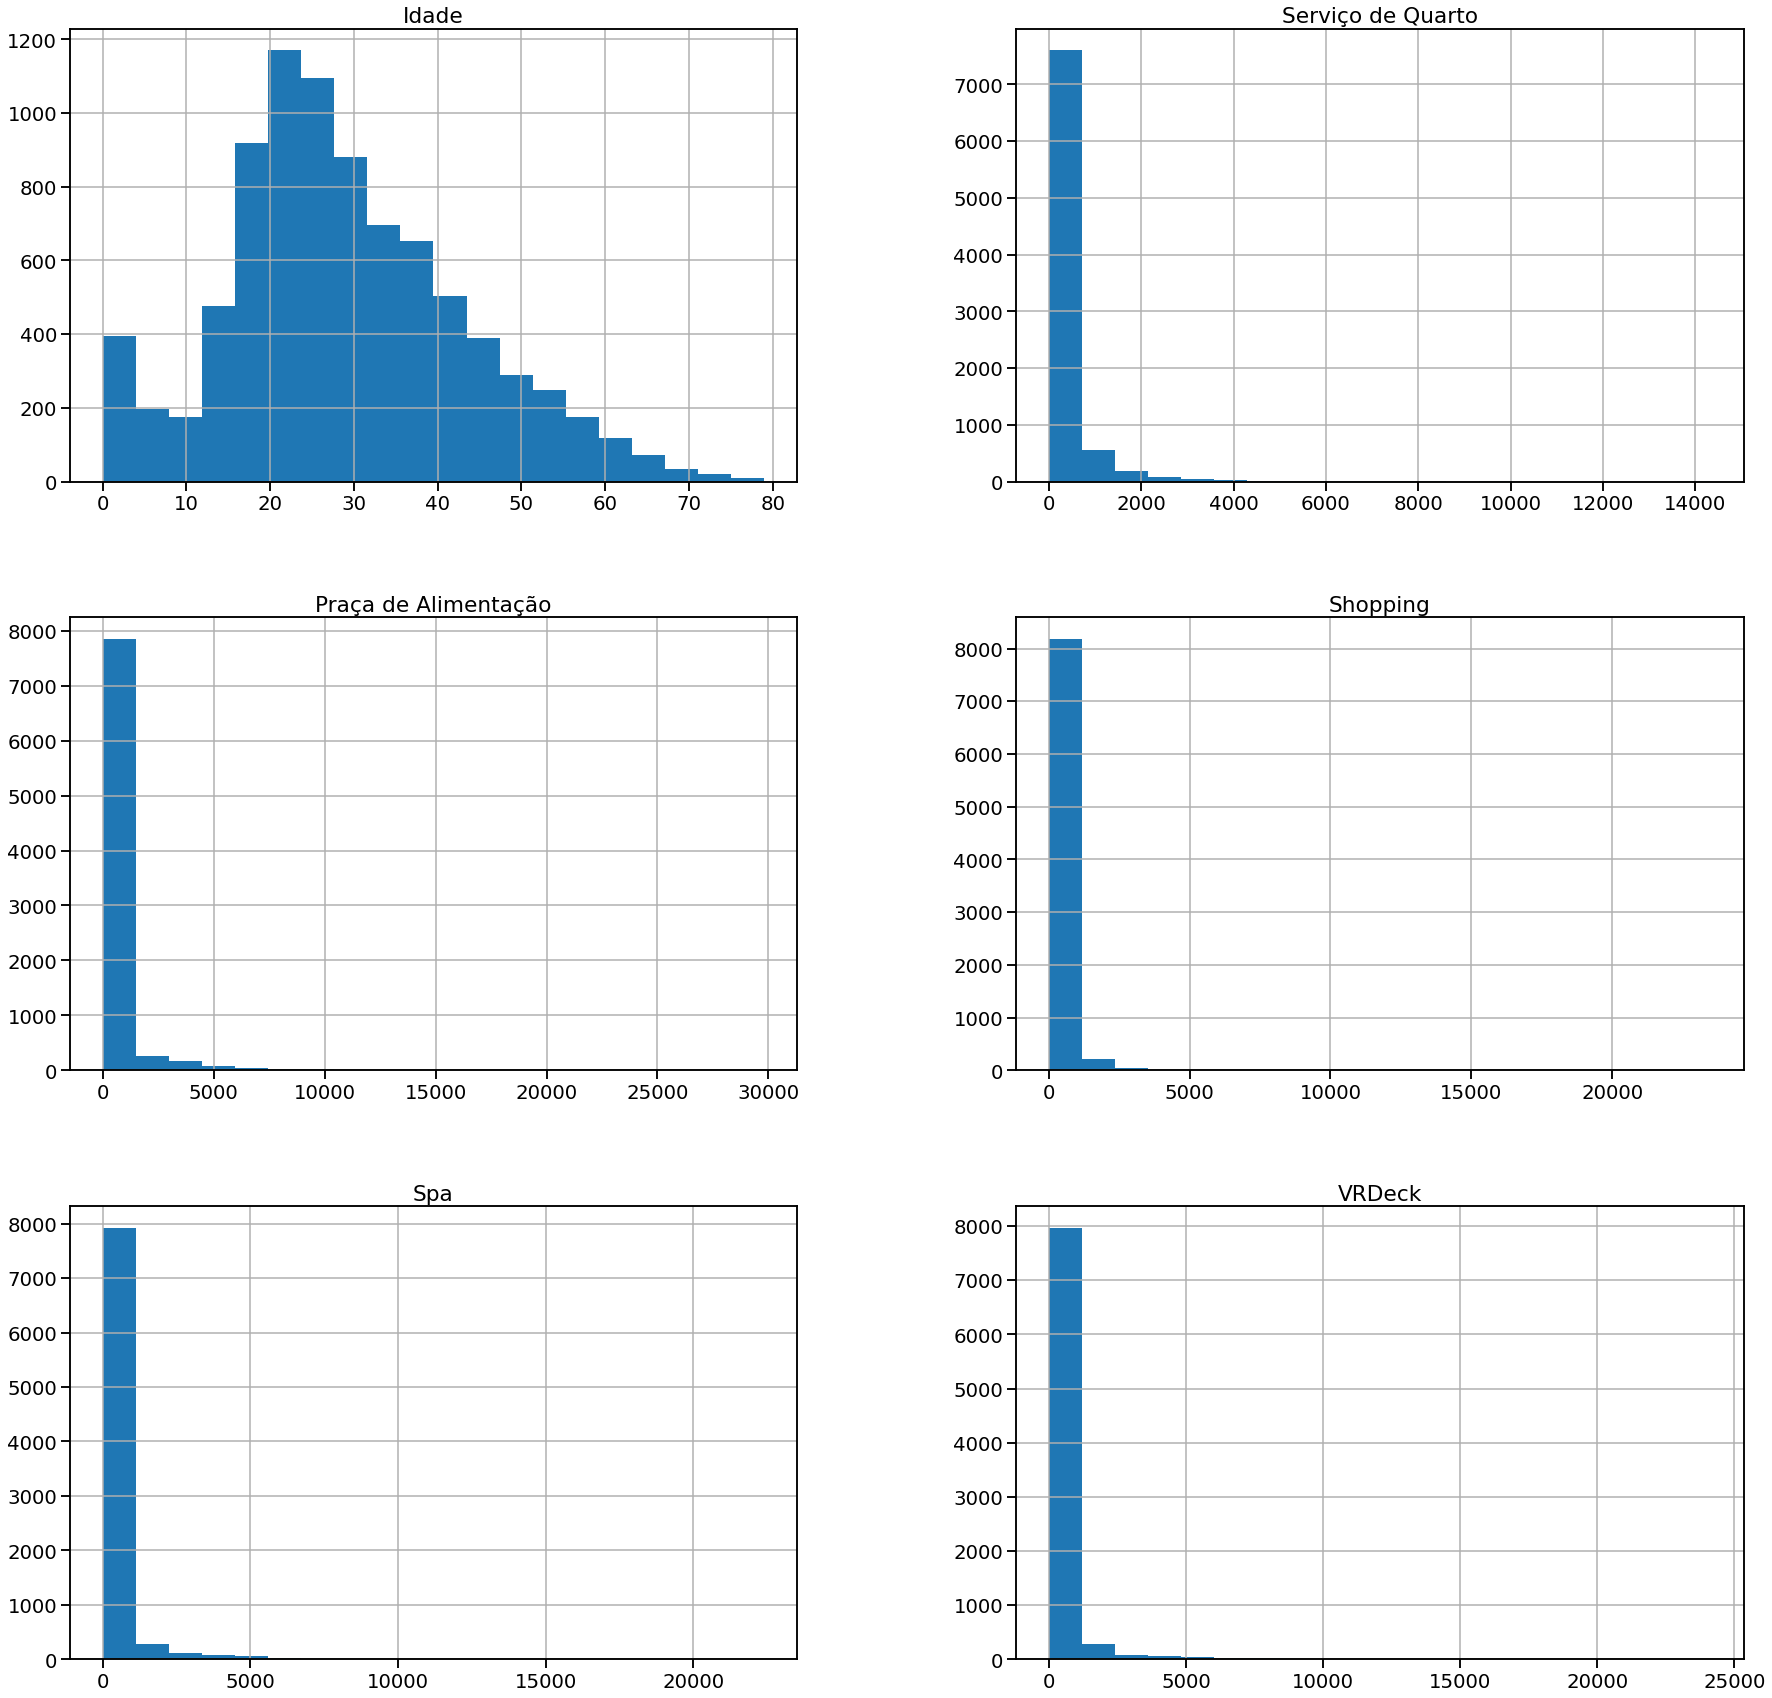

In [37]:
df.hist(bins=20, figsize=(30,30));

Vemos nestas análises, apenas as variáveis numéricas, e temos no histograma um padrão, então, ainda que tenha dados faltantes neste dataframe, eles não atrapalham na análise desses dados.

## **PREPARAÇÃO DOS DADOS**

Nesta parte, podemos mostrar os dados de uma outra forma, para que fique mais visível as informações em cada variável resposta

In [41]:
matplotlib.pyplot.figure(figsize=(10,5))
corr = df[['IdPassageiro','Planeta Natal','Sono criogênico','Cabine','Destino','Idade','VIP','Serviço de Quarto','Praça de Alimentação','Shopping','Spa','VRDeck','Nome','Transportado']].corr()

display(corr)

,Idade,Serviço de Quarto,Praça de Alimentação,Shopping,Spa,VRDeck,Transportado
Idade,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
Serviço de Quarto,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
Praça de Alimentação,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
Shopping,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transportado,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<Figure size 720x360 with 0 Axes>

Quanto mais próximo de -1 ou 1, podemos afirmar que há uma correlação entre duas variáveis

Para uma melhor visualização dessa correlação, plotamos a seguinte demosntração utilizando um mapa de calor:

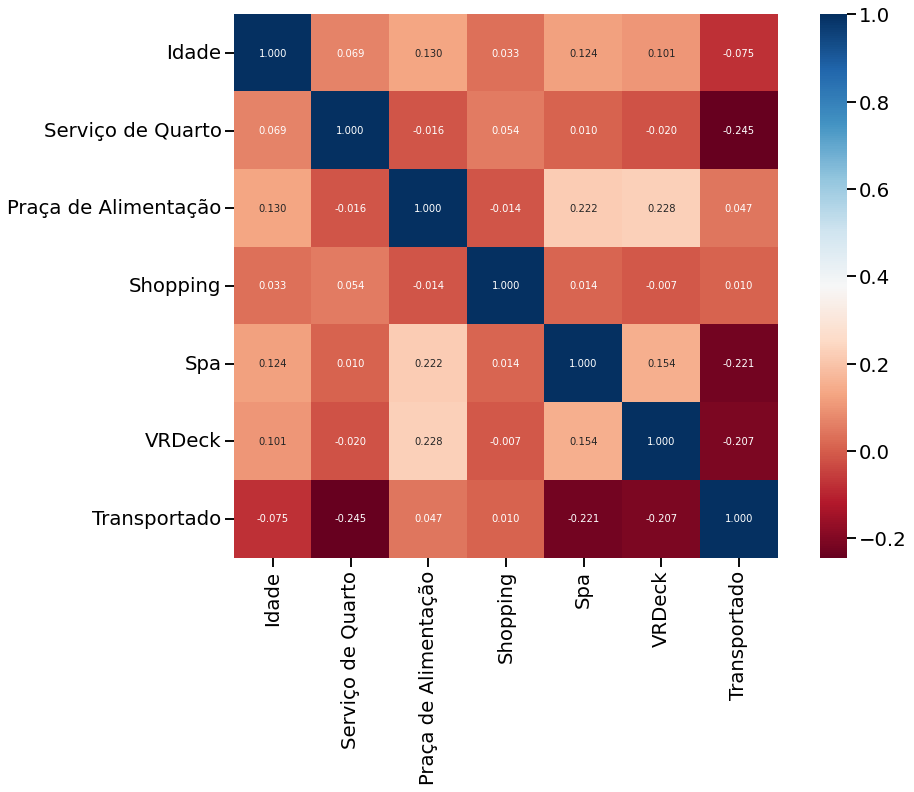

In [42]:
matplotlib.pyplot.figure(figsize=(15,10))
seaborn.heatmap(corr, cmap='RdBu', fmt='.3f', square=True, linecolor='white', annot=True);

## **Construção de Modelos**

Neste passo, as atividades são escolhidas assumindo as técnicas mais adequadas  para modelagem, com base em algoritmos de mineração, onde testes iniciais voltados à calibração de parâmetros dos algoritmos serão feitos. Utilizando ferramentas próprias para isso

## **Avaliando os Resultados do Projeto de DS**

O insumo desta fase é a saída da fase anterior em forma de um ou mais modelos. A avaliação vai checar se o modelo elaborado condiz com as expectativas da organização e do que foi definido anteriormente na fase inicial do processo. O resultado desta avaliação pode ser aceitável ou pode resultar na necessidade de revisão das fases anteriores, a fim de redefinir alguns passos.

Nosso projeto possui o presente relatório final de entrega e de forma concomitante buscou-se realizar uma revisão dos principais pontos do mesmo, passando-se pelas 6 (seis) etapas da metodologia CRISP-DM.

## **Conclusões**

O presente projeto tratou de uma análise exploratória de dados (EDA) da nave titanic, como explicada na introdução.

Na condução do projeto optou-se pela adoção da metodologia CRISP-DM composta por suas 6 (seis) etapas. Inicialmente, na etapa de entendimento do negócio, foi feita uma análise do dataframe de forma superficial, mostrando o número de linhas e colunas, dados faltantes e a explicação de cada variável.  Na sequência, na fase de entendimento dos dados, houve uma forte preocupacão no estudo dos dados, com especial atenção para conhecermos seu formato, tipos de variáveis,identificação de dados faltantes,bem como uma análise de correlacão entre as variáveis do dataset; houve também a tradução das colunas para português para mais fácil interpretação e a produção de histogramas.
Na etapa posterior, de preparação dos dados, foi demonstrado as análises de correlação com um mapa de calor, para melhor visualização.
Já na etapa de modelagem, foi explicado que é necessário ferramentas para testagem do modelo com técnicas especializadas. Logo em seguida, na avaliação do projeto foi possível constatar que a análise dos dados foi feita da melhor forma possível, por meio do alcance dos objetivos previamente definidos e por fim, na fase de implementação foram feitas reflexões sobre a fase de implementação do projeto em produção.

Este dataframe ainda está em andamento, então a versão utilizada não foi concluída e não é possível uma análise mais detalhada por conta desse status.

## **Referências**

Arquivo: spaceship-titanic.zip
         train_csv